In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TMA_Data.csv')

In [4]:
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


## Qns 1b)

In [5]:
df_mean1 = df.groupby(['Marital']).mean()
df_mean1 = df_mean1.reset_index()
df_mean1.head()

,Marital,ID,Salary,Survey,Satisfaction,Absence
0,Divorced,99.192308,64245.807692,4.280769,4.000000,9.576923
1,Married,131.914894,71827.851064,4.109787,3.808511,11.095745
2,Others,133.187500,64084.687500,4.220625,3.875000,8.875000
3,Single,125.131579,68702.280702,4.222193,4.052632,10.035088


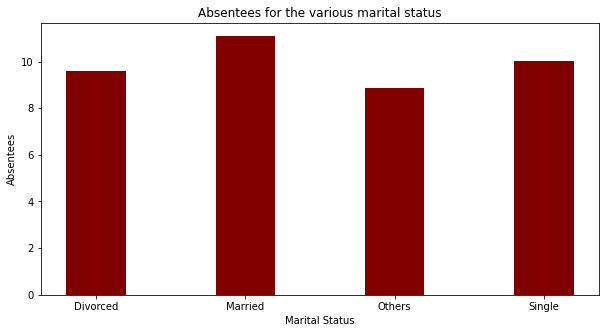

In [6]:
#plot 1
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_mean1['Marital'], df_mean1['Absence'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Marital Status")
plt.ylabel("Absentees")
plt.title("Absentees for the various marital status")
plt.show()

In [8]:
df_mean2 = df.groupby(['Citizenship']).mean()
df_mean2 = df_mean2.reset_index()
df_mean2.head()

,Citizenship,ID,Salary,Survey,Satisfaction,Absence
0,Citizen,117.776650,69082.588832,4.216294,3.923858,9.898477
1,Non-Resident,222.500000,72489.312500,3.886875,3.875000,10.812500
2,PR,124.675676,67852.027027,4.153514,4.081081,12.297297


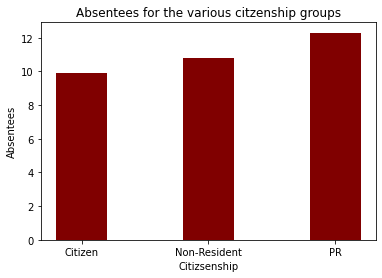

In [9]:
#plot 2
# creating the bar plot
plt.bar(df_mean2['Citizenship'], df_mean2['Absence'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Citizsenship")
plt.ylabel("Absentees")
plt.title("Absentees for the various citzenship groups")
plt.show()

## Qns 1c)

### Find the length of service of all the staff, using Python. For staff who has not left the 
### organization, use 1st May 2022 as the LeftDate. State the minimum, maximum and 
### average length of service, expressing in years, rounded to 1 decimal place. (1 year is 
### taken as 365 days.

In [8]:
df['LeftDate'] = df['LeftDate'].fillna('1/5/2022')
df['LeftDate'] =  pd.to_datetime(df['LeftDate'], format='%m/%d/%Y')

In [9]:
df['JoinDate'] = df['JoinDate'].fillna('1/5/2022')
df['JoinDate'] =  pd.to_datetime(df['JoinDate'], format='%m/%d/%Y')

In [10]:
df['duration in days'] = (df['LeftDate'] - df['JoinDate']).dt.days
df['duration in days']

0      3565
1      2795
2      2655
3      2192
4      3345
       ... 
245    2515
246    1721
247    2922
248    1114
249    2473
Name: duration in days, Length: 250, dtype: int64

In [11]:
df['duration in years'] = df['duration in days']/365
df['duration in years']

0      9.767123
1      7.657534
2      7.273973
3      6.005479
4      9.164384
         ...   
245    6.890411
246    4.715068
247    8.005479
248    3.052055
249    6.775342
Name: duration in years, Length: 250, dtype: float64

In [12]:
max_service = round(max(df['duration in years']), 1)
min_service = round(min(df['duration in years']), 1)

In [13]:
max_service

16.0

In [14]:
min_service

0.1

The maximum service is 16.0 years while the minumum service is 0.1 years.

## part d)

In [ ]:
loop = True
while loop:
    user_input = input("Please input the full name of the person: ")
    loop2 = 'not_here'
    for i in df['Staff']:
        
        if user_input == i:
            print("Yes, this person is part of the organisation")
            loop2 = 'its_here'
            pass
    if loop2 == 'not_here':
        print("No, this person is not part of the organisation")

Please input the full name of the person: Aairah Hastings
Yes, this person is part of the organisation
Please input the full name of the person: sds
No, this person is not part of the organisation
Please input the full name of the person: Aairah Hastings
Yes, this person is part of the organisation
Please input the full name of the person: Aamna Howell
Yes, this person is part of the organisation
Please input the full name of the person: ert34u4803
No, this person is not part of the organisation
